In [82]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

In [86]:
import requests
from bs4 import BeautifulSoup


url = "https://uzhavarbumi.com/reviews"


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'
}


response = requests.get(url, headers=headers)


if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    reviews = soup.find_all('div', class_='card-body')


    for review in reviews:

        name = review.find('span', class_='card-title mb-5').get_text(strip=True)
        

        review_text = review.find('p', class_='card-text pb-4').get_text(strip=True)

        print(f"Reviewer: {name}")
        print(f"Review: {review_text}")
        print('-' * 80)

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Reviewer: Sasi Mohan
Review: I am very happy to share this information eventhough I have been knowing this product for a quite while. But after being a customer of Uzhavarbhumi for past 15 days, I feel it's very worth for the cost to buy milk from them. On-time delivery, the freshness of milk that apt for the kids(Mostly the breakfast for early school going kids), and I am super excited when I tried the curd, it is very thick and tasty. Yet to try Ghee, Paneer which I am damn sure it will be very good. Thanks Uzhavarbhumi for being the part of our life!!!
--------------------------------------------------------------------------------
Reviewer: RamaKalpana KaviKumar
Review: Good Quality of Milk and reasonably delivery fee also. Easy to use app and wallet amount can't be refundable is somewhat is not okay.
--------------------------------------------------------------------------------
Reviewer: Sangavi Jambu
Review: Good quality milk, I give this milk to my child also. Very healthy and

In [37]:
# Total number of reviews
total_reviews = len(reviews)
print(f"Total number of reviews: {total_reviews}")


Total number of reviews: 30


In [88]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://uzhavarbumi.com/reviews"


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'
}


response = requests.get(url, headers=headers)


if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')

    reviews = soup.find_all('div', class_='card-body')

    reviewers = []
    review_texts = []

    for review in reviews:

        reviewer_name = review.find('span', class_='card-title mb-5').get_text(strip=True)

        review_text = review.find('p', class_='card-text pb-4').get_text(strip=True)

        reviewers.append(reviewer_name)
        review_texts.append(review_text)
   
    reviews_df = pd.DataFrame({
        'Reviewer': reviewers,
        'Review': review_texts
    })
    
 
    reviews_df.to_excel('customer_reviews.xlsx', index=False)
    print("Reviews saved to 'customer_reviews.xlsx' successfully.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Reviews saved to 'customer_reviews.xlsx' successfully.


In [47]:
from IPython.display import FileLink

# link to download the file
FileLink(r'customer_reviews.xlsx')


C:\Users\divaa\customer_reviews.xlsx

In [90]:
import pandas as pd

file_path = r'C:\Users\divaa\Downloads\customer_reviews.xlsx'
df = pd.read_excel(file_path)

df.head()


,Reviewer,Review
0,Sasi Mohan,I am very happy to share this information even...
1,RamaKalpana KaviKumar,Good Quality of Milk and reasonably delivery f...
2,Sangavi Jambu,"Good quality milk, I give this milk to my chil..."
3,Aadhirai,Good quality milk they provide. They also Quic...
4,Bala venkat,I am buying milk for the past one month. Milk ...


In [92]:

df.isnull().sum()


Reviewer    0
Review      0
dtype: int64

In [100]:
from textblob import TextBlob


def get_sentiment(review):

    analysis = TextBlob(review)
    

    return analysis.sentiment.polarity  # Returns a value between -1 and 1

df['Sentiment'] = df['Review'].apply(get_sentiment)

df.head()


,Reviewer,Review,Sentiment
0,Sasi Mohan,I am very happy to share this information even...,0.359905
1,RamaKalpana KaviKumar,Good Quality of Milk and reasonably delivery f...,0.270833
2,Sangavi Jambu,"Good quality milk, I give this milk to my chil...",0.675000
3,Aadhirai,Good quality milk they provide. They also Quic...,0.516667
4,Bala venkat,I am buying milk for the past one month. Milk ...,0.394444


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment analysis added and saved to 'customer_reviews_with_sentiment.xlsx'.


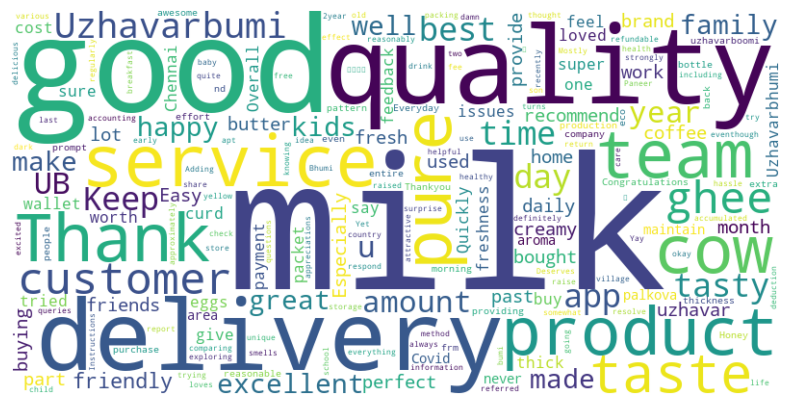

In [112]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the Excel file
reviews_df = pd.read_excel('customer_reviews.xlsx')

# Lists to store sentiment analysis results
sentiments = []

# Loop through each review and perform sentiment analysis using TextBlob
for review in reviews_df['Review']:
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity  # Get the polarity (-1 to 1)
    sentiments.append(sentiment)

# Add sentiment results to the DataFrame
reviews_df['Sentiment'] = sentiments

# Save the updated DataFrame with sentiment to Excel
reviews_df.to_excel('customer_reviews_with_sentiment.xlsx', index=False)
print("Sentiment analysis added and saved to 'customer_reviews_with_sentiment.xlsx'.")

# Perform Content Analysis (Word Cloud)
all_reviews_text = ' '.join(reviews_df['Review'])

# Remove stopwords
filtered_words = ' '.join([word for word in all_reviews_text.split() if word.lower() not in stop_words])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [117]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import nltk
import string

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the Excel file
reviews_df = pd.read_excel('customer_reviews.xlsx')

# Convert all reviews to strings
reviews_df['Review'] = reviews_df['Review'].astype(str)

# Combine all reviews into one large text
all_reviews_text = ' '.join(reviews_df['Review'])

# Tokenize and clean the text
words = all_reviews_text.split()  # Split the text into individual words
words = [word.lower() for word in words]  # Convert all words to lowercase
words = [word for word in words if word not in stop_words]  # Remove stopwords
words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]  # Remove punctuation
words = [word for word in words if word.isalpha()]  # Keep only alphabetic words

# Calculate word frequency
word_freq = Counter(words)

# Get the 10 most common words
most_common_words = word_freq.most_common(10)

# Display the most common words and their frequency
print("Most common words and their frequencies:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most common words and their frequencies:
milk: 50
good: 23
quality: 14
delivery: 12
also: 9
service: 9
pure: 9
team: 8
cow: 7
products: 7


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
from textblob import TextBlob
reviews_df['Review'] = reviews_df['Review'].astype(str)
sentiments = []

# Loop through each review and perform sentiment analysis using TextBlob
for review in reviews_df['Review']:
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity  # Get the polarity (-1 to 1)
    sentiments.append(sentiment)

# Add sentiment results to the DataFrame
reviews_df['Sentiment'] = sentiments

# Classify the sentiment as Positive, Neutral, or Negative
reviews_df['Sentiment_Class'] = reviews_df['Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative')
)

# Count the number of Positive, Neutral, and Negative reviews
sentiment_counts = reviews_df['Sentiment_Class'].value_counts()

# Display the counts
print("Sentiment Counts:")
print(sentiment_counts)

# Save the updated DataFrame with sentiment classification to Excel
reviews_df.to_excel('customer_reviews_with_sentiment_class.xlsx', index=False)
print("Sentiment analysis and classification added and saved to 'customer_reviews_with_sentiment_class.xlsx'.")


Sentiment Counts:
Sentiment_Class
Positive    30
Name: count, dtype: int64
Sentiment analysis and classification added and saved to 'customer_reviews_with_sentiment_class.xlsx'.
